
# Descriptive Analysis of Vietnam National High School Graduation Exam Scores (2024)

This notebook provides a comprehensive descriptive analysis of the 2024 Vietnam National High School Graduation Exam scores. The objective is to explore the distributions, variability, and potential insights from the exam scores in major subjects, focusing on trends, deviation, and implications for higher education admissions.

Dataset Source: Kaggle - [Vietnam National Exam 2024](https://www.kaggle.com/datasets/hakudan/im-thi-thpt-nm-2024)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv("diem_thi_thpt_2024.csv")
df.head()


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


## Basic Dataset Overview

In [2]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1061605 non-null  int64  
 1   toan          1045613 non-null  float64
 2   ngu_van       1050101 non-null  float64
 3   ngoai_ngu     912705 non-null   float64
 4   vat_li        345615 non-null   float64
 5   hoa_hoc       346518 non-null   float64
 6   sinh_hoc      342378 non-null   float64
 7   lich_su       706214 non-null   float64
 8   dia_li        704682 non-null   float64
 9   gdcd          583609 non-null   float64
 10  ma_ngoai_ngu  912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB


## Missing Values by Subject

In [3]:

df.isnull().sum().sort_values(ascending=False)


sinh_hoc        719227
vat_li          715990
hoa_hoc         715087
gdcd            477996
dia_li          356923
lich_su         355391
ngoai_ngu       148900
ma_ngoai_ngu    148900
toan             15992
ngu_van          11504
sbd                  0
dtype: int64

## Summary Statistics of All Subjects

In [4]:

df.describe()


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
count,1.061605e+06,1.045613e+06,1.050101e+06,912705.000000,345615.000000,346518.00000,342378.000000,706214.000000,704682.000000,583609.000000
mean,2.734354e+07,6.447309e+00,7.231146e+00,5.521938,6.666866,6.68083,6.284079,6.570343,7.193541,8.156503
std,1.919442e+07,1.556900e+00,1.330057e+00,1.880657,1.631129,1.64147,1.244849,1.462804,1.283945,1.042644
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,9.006324e+06,5.400000e+00,6.500000e+00,4.000000,5.500000,5.50000,5.500000,5.500000,6.500000,7.500000
50%,2.800794e+07,6.800000e+00,7.500000e+00,5.200000,7.000000,6.75000,6.250000,6.500000,7.250000,8.250000
75%,4.400492e+07,7.600000e+00,8.250000e+00,7.000000,8.000000,8.00000,7.250000,7.500000,8.000000,9.000000
max,6.400729e+07,9.800000e+00,1.000000e+01,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000


## Distribution of Core Subject Scores

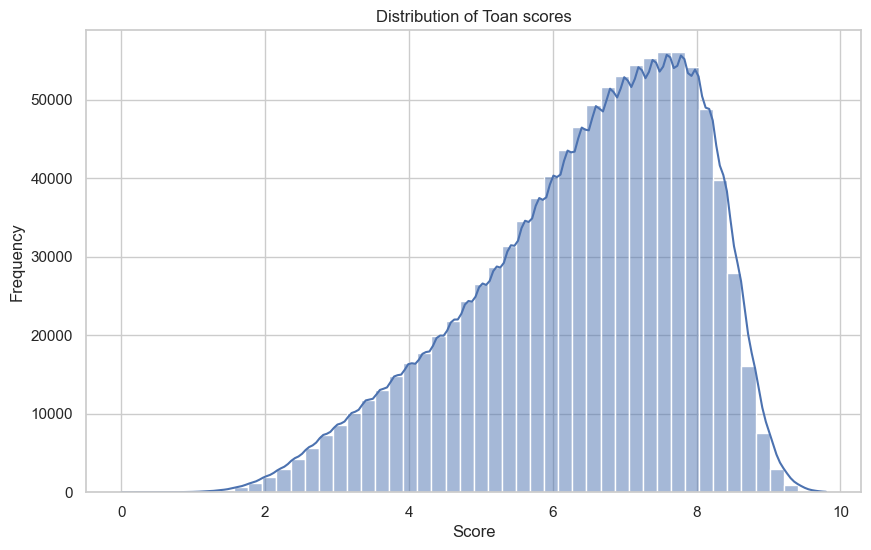

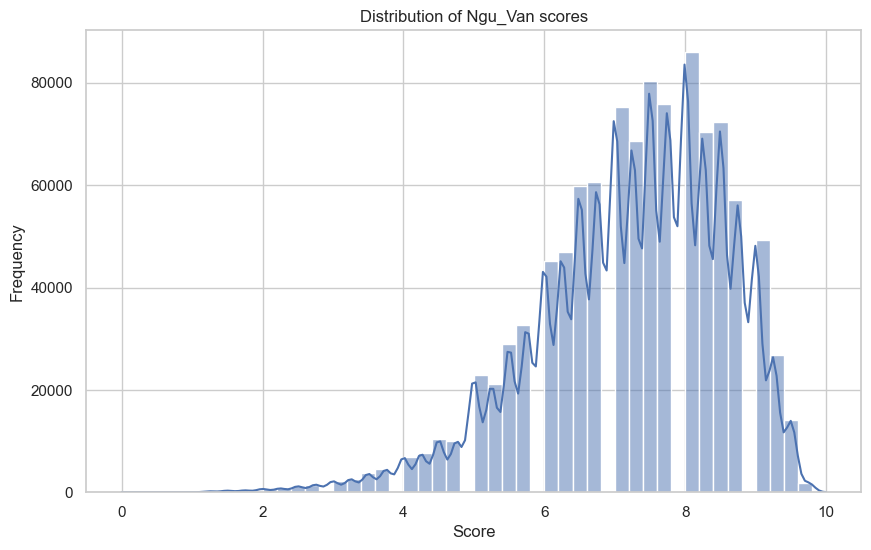

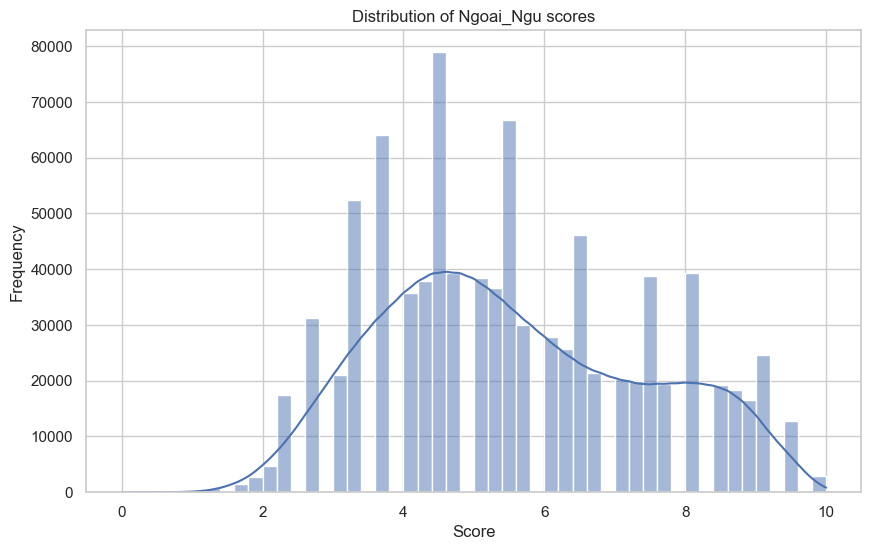

In [5]:

core_subjects = ['toan', 'ngu_van', 'ngoai_ngu']

for subject in core_subjects:
    sns.histplot(df[subject], bins=50, kde=True)
    plt.title(f"Distribution of {subject.title()} scores")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.show()


## Comparison Between Natural and Social Science Combinations

In [6]:

# Count number of students who took each combination
df['KHTN'] = df[['vat_li', 'hoa_hoc', 'sinh_hoc']].notnull().all(axis=1)
df['KHXH'] = df[['lich_su', 'dia_li', 'gdcd']].notnull().all(axis=1)
df[['KHTN', 'KHXH']].sum()


KHTN    339787
KHXH    583106
dtype: int64

## Score Distribution by Science Type (Boxplots)

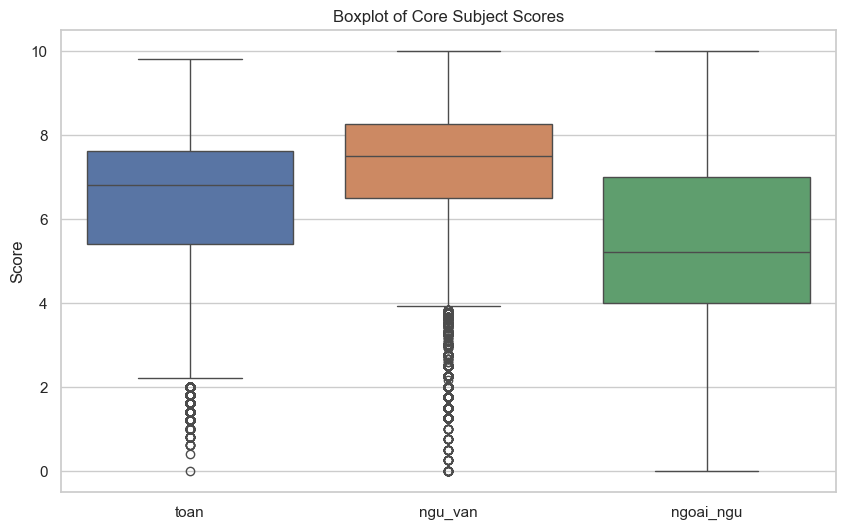

In [7]:

sns.boxplot(data=df[['toan', 'ngu_van', 'ngoai_ngu']])
plt.title("Boxplot of Core Subject Scores")
plt.ylabel("Score")
plt.show()


## Skewness and Standard Deviation Analysis

In [8]:
# Select only numeric columns (i.e., exam scores)
score_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute standard deviation and skewness for each score column
skew_std = pd.DataFrame({
    'std_dev': df[score_columns].std(),
    'skewness': df[score_columns].skew()
}).sort_values(by='std_dev', ascending=False)

skew_std


,std_dev,skewness
sbd,1.919442e+07,0.103482
ngoai_ngu,1.880657e+00,0.290922
hoa_hoc,1.641470e+00,-0.352410
vat_li,1.631129e+00,-0.614245
toan,1.556900e+00,-0.635759
lich_su,1.462804e+00,-0.124201
ngu_van,1.330057e+00,-0.736076
dia_li,1.283945e+00,-0.398119
sinh_hoc,1.244849e+00,-0.189126
gdcd,1.042644e+00,-0.945417


## Correlation Heatmap Between Subjects

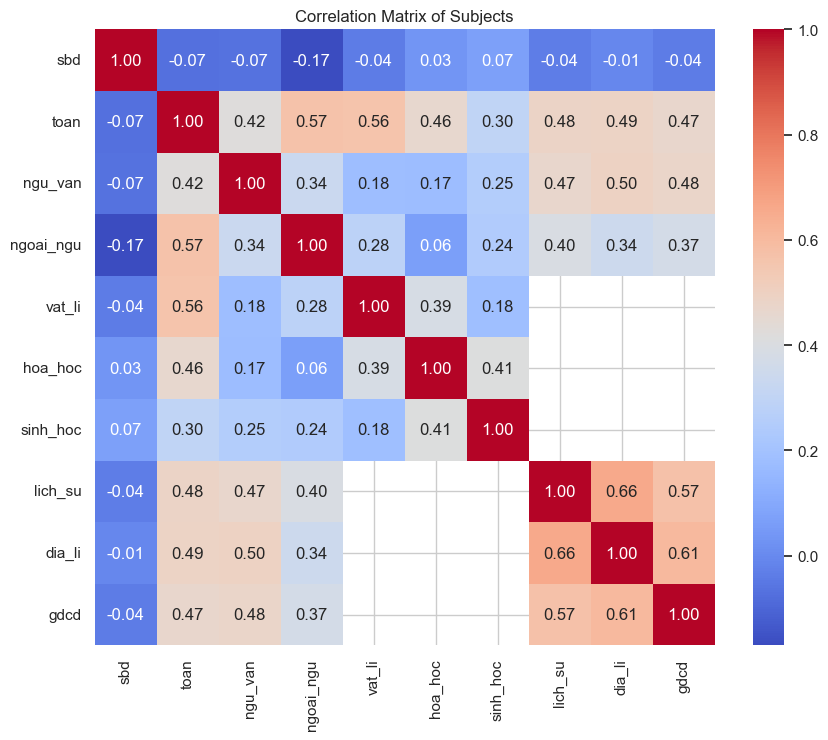

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Subjects")
plt.show()



## Key Insights and Implications

- **Toán (Math)** scores show a relatively normal distribution with high participation.
- **Ngữ Văn (Literature)** has lower skewness, indicating better centering around the mean.
- **Ngoại Ngữ (Foreign Language)** shows higher standard deviation, suggesting wide variation in performance.
- Many students opted for either Natural Sciences (KHTN) or Social Sciences (KHXH), not both.
- Strong positive correlations are seen among Natural Science subjects, while Literature is less correlated.
- The distribution suggests that the **difficulty level** of the 2024 exam was moderate, with few students scoring near the minimum or maximum, indicating good test differentiation.
- Implications for university admissions:
  - Highly competitive programs should consider score deviation and selectivity.
  - Foreign language scores might be a strong differentiator due to their wide distribution.
